# Capstone Project 2 - 주식 가격 가져오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data_reader

## 삼성전자 주식 가격

In [2]:
SAMSUNG = data_reader.DataReader("005930.KS", data_source="yahoo")
SAMSUNG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-11,46180.0,45220.0,45420.0,45500.0,21277850.0,39413.785156
2017-05-12,46160.0,45660.0,45760.0,45820.0,9422900.0,39690.976562
2017-05-15,46280.0,45620.0,45620.0,46100.0,8001400.0,39933.539062
2017-05-16,46800.0,46100.0,46660.0,46380.0,8803750.0,40176.070312
2017-05-17,46640.0,46100.0,46120.0,46340.0,7424450.0,40141.433594


In [3]:
SAMSUNG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-02,67600.0,66500.0,66600.0,67300.0,14106184.0,67300.0
2022-05-03,68400.0,67300.0,67400.0,67500.0,14168875.0,67500.0
2022-05-04,68400.0,67500.0,68000.0,67900.0,11505248.0,67900.0
2022-05-06,67100.0,66500.0,67000.0,66500.0,14356156.0,66500.0
2022-05-10,66300.0,65300.0,65900.0,65700.0,17152974.0,65700.0


<AxesSubplot:xlabel='Date'>

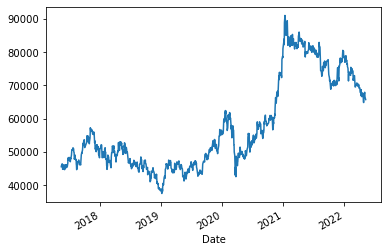

In [4]:
SAMSUNG['Close'].plot()

In [5]:
SAMSUNG.to_csv("SAMSUNG.csv")

## 일반 함수화

In [6]:
def get_stock_price(country, ticker):
    if country == "KR":
        df = data_reader.DataReader(ticker + ".KS", data_source="yahoo")
    elif country == "US":
        df = data_reader.DataReader(ticker, data_source="yahoo")
    return df

In [7]:
df = get_stock_price("US", "TSLA")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-10,65.099998,63.624001,64.311996,65.043999,28708000.0,65.043999
2017-05-11,65.199997,63.919998,64.680000,64.620003,23769000.0,64.620003
2017-05-12,65.400002,64.306000,65.096001,64.961998,20608000.0,64.961998
2017-05-15,64.040001,62.506001,63.675999,63.175999,38110000.0,63.175999
2017-05-16,64.012001,63.028000,63.518002,63.402000,20762500.0,63.402000


<AxesSubplot:xlabel='Date'>

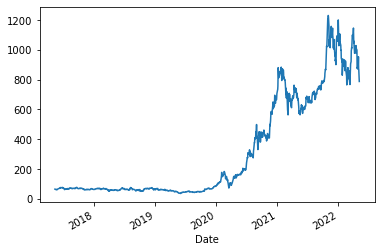

In [8]:
df['Close'].plot()

In [9]:
df = get_stock_price("KR", "005490") #포항제철
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-11,273500.0,269000.0,269000.0,270500.0,302914.0,224159.890625
2017-05-12,273500.0,270500.0,271500.0,272500.0,240894.0,225817.296875
2017-05-15,273000.0,268500.0,272500.0,271000.0,212739.0,224574.187500
2017-05-16,273500.0,269000.0,273000.0,273000.0,224169.0,226231.609375
2017-05-17,272500.0,268000.0,272000.0,270500.0,253721.0,224159.890625


## 여러 주식 종목의 가격 비교

In [10]:
tesla = get_stock_price("US", "TSLA")
ford = get_stock_price("US", "FORD")
apple = get_stock_price("US", "AAPL")
google = get_stock_price("US", "GOOGL")
sec = get_stock_price("KR", "005930")

### Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [11]:
tesla['normed Close'] = tesla['Close']/tesla['Close'][0]
ford['normed Close'] = ford['Close']/ford['Close'][0]
apple['normed Close'] = apple['Close']/apple['Close'][0]
google['normed Close'] = google['Close']/google['Close'][0]
sec['normed Close'] = sec['Close']/sec['Close'][0]

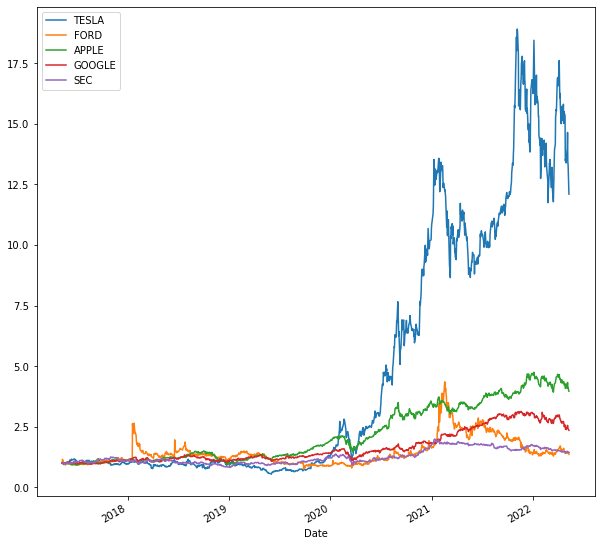

In [12]:
plt.figure(figsize=(10, 10))
tesla['normed Close'].plot(label='TESLA')
ford['normed Close'].plot(label='FORD')
apple['normed Close'].plot(label='APPLE')
google['normed Close'].plot(label='GOOGLE')
sec['normed Close'].plot(label='SEC')
plt.legend()